# Final manuscript figures

In [1]:
from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, confusion_matrix, ConfusionMatrixDisplay, classification_report
import torch

import sys
sys.path.append("../../")
from utils.data_utils import load_data

## Load saved results

In [2]:
# SOC prediction results
A_soc = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_soc_A_only.pth")
B_soc = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_soc_B_only.pth")
C_soc = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_soc_C_only.pth")
D_soc = torch.load("../../results/RESULTS_xgboost_cells_D/bootstrap_results_D_only_with_P-I.pth")
D_soc = {key: D_soc[key] for key in D_soc if 'soc' in key}

# SOC prediction results with baseline input features (OCV and T only)
A_soc_baseline = torch.load("../../results/experiment_soc_from_[OCV,T]_only/bootstrap_results_A_only.pth")
B_soc_baseline = torch.load("../../results/experiment_soc_from_[OCV,T]_only/bootstrap_results_B_only.pth")
C_soc_baseline = torch.load("../../results/experiment_soc_from_[OCV,T]_only/bootstrap_results_C_only.pth")
D_soc_baseline = torch.load("../../results/RESULTS_xgboost_cells_D/bootstrap_results_D_soc_from_v_t_only.pth")

A_soc_baseline = {'soc, [OCV,T] Baseline': A_soc_baseline['soc, Static PsRP 1']}
B_soc_baseline = {'soc, [OCV,T] Baseline': B_soc_baseline['soc, Static PsRP 1']}
C_soc_baseline = {'soc, [OCV,T] Baseline': C_soc_baseline['soc, Static PsRP 1']}
D_soc_baseline = {'soc, [OCV,T] Baseline': D_soc_baseline['soc, Static PsRP 1']}

# Physical targets (volume, thickness, and excess electrolyte) results
A_volume = torch.load("../../results/RESULTS_xgboost_cells_A-D_physical_targets/bootstrap_results_A.pth")
C_volume = torch.load("../../results/RESULTS_xgboost_cells_A-D_physical_targets/bootstrap_results_C.pth")
D_volume = torch.load("../../results/RESULTS_xgboost_cells_A-D_physical_targets/bootstrap_results_D.pth")

C_elec = torch.load("../../results/RESULTS_xgboost_cells_A-D_physical_targets/bootstrap_results_electrolyte_C.pth")
D_elec = torch.load("../../results/RESULTS_xgboost_cells_A-D_physical_targets/bootstrap_results_electrolyte_D.pth")

# Other regression targets results
A = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_A_only.pth")
B = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_B_only.pth")
C = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_C_only.pth")
C_discharge_redo = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_redocapacityNY_C_only.pth")
for key in C_discharge_redo:
    C[key] = C_discharge_redo[key]
D = torch.load("../../results/RESULTS_xgboost_cells_D/bootstrap_results_D_only_with_P-I.pth")
D = {key: D[key] for key in D if 'soc' not in key}

C:\Users\pgasper\AppData\Local\Temp\1\ipykernel_452\735927034.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  A_soc = torch.load("../../results/RESULTS_xgboost_cells_A-C

In [3]:
# "Safety" results
pulse = "Static PsRP 1"
target = "Post 1C charge relaxation fit MSE_outlier"

A_safety_1c = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_outlier_A_only.pth")
B_safety_1c = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_outlier_B_only.pth")
C_safety_1c = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_outlier_C_only.pth")
safety_all = pd.concat([A_safety_1c[f"{target}, {pulse}"], B_safety_1c[f"{target}, {pulse}"], C_safety_1c[f"{target}, {pulse}"]])

C:\Users\pgasper\AppData\Local\Temp\1\ipykernel_452\3428622958.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  A_safety_1c = torch.load("../../results/RESULTS_xgboost_ce

In [4]:
# Results predicting discharge capacity as a classification instead of regression
A_cap_class = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_capacity3bins_A_only_thresholdredo.pth")
B_cap_class = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_capacity3bins_B_only_thresholdredo.pth")
C_cap_class = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_capacity3bins_C_only.pth")
D_cap_class = torch.load("../../results/RESULTS_xgboost_cells_D/bootstrap_results_D_capacity_classification.pth")

C:\Users\pgasper\AppData\Local\Temp\1\ipykernel_452\1685127632.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  A_cap_class = torch.load("../../results/RESULTS_xgboost_ce

In [5]:
# Results predicting SOC using DCIR directly
A_dcir = torch.load("../../results/experiment_DCIR_feature/bootstrap_results_A.pth")
B_dcir = torch.load("../../results/experiment_DCIR_feature/bootstrap_results_B.pth")
C_dcir = torch.load("../../results/experiment_DCIR_feature/bootstrap_results_C.pth")
D_dcir = torch.load("../../results/experiment_DCIR_feature/bootstrap_results_D.pth")
A_dcir_soc = torch.load("../../results/experiment_DCIR_feature/bootstrap_results_A_soc.pth")
B_dcir_soc = torch.load("../../results/experiment_DCIR_feature/bootstrap_results_B_soc.pth")
C_dcir_soc = torch.load("../../results/experiment_DCIR_feature/bootstrap_results_C_soc.pth")
D_dcir_soc = torch.load("../../results/experiment_DCIR_feature/bootstrap_results_D_soc.pth")
A_dcir['soc, DCIR'] = A_dcir_soc['soc, DCIR']
B_dcir['soc, DCIR'] = B_dcir_soc['soc, DCIR']
C_dcir['soc, DCIR'] = C_dcir_soc['soc, DCIR']
D_dcir['soc, DCIR'] = D_dcir_soc['soc, DCIR']

C:\Users\pgasper\AppData\Local\Temp\1\ipykernel_452\1782796785.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  A_dcir = torch.load("../../results/experiment_DCIR_feature

In [6]:
def get_metrics_all_targets(results_dict_list):
    """
    Construct a wide format df for plotting convenience
    """
    metrics = {
                'r2': [],
                'mae': [],
                'mape': [],
                'Target': [],
                'Cell ID': [],
                'Pulse Type': [],
              }
    for results_dict_soc in results_dict_list:
        for key in results_dict_soc:
            if 'features' in key:
                continue
                
            target, pulse = key.split(', ')
            if target == 'Post 1C charge relaxation fit MSE':
                continue
            df = results_dict_soc[key]
            cell_id = df['cell_id'][0][0]

            for run in range(50):
                test_subset = df[df[run].notna()]
                r2 = r2_score(test_subset[target], test_subset[run])
                mae = mean_absolute_error(test_subset[target], test_subset[run])
                mape = mean_absolute_percentage_error(test_subset[target], test_subset[run])         
                metrics[f"r2"].append(r2)
                metrics[f"mae"].append(mae)
                metrics["mape"].append(mape)
                
            metrics['Target'] += [target] * 50
            metrics['Cell ID'] += [cell_id] * 50
            metrics['Pulse Type'] += [pulse] * 50

    return pd.DataFrame(metrics)

In [7]:
def t(metrics, target, pulses=None):
    metrics = metrics[metrics['Target'] == target]
    if pulses is not None:
        metrics = metrics[metrics['Pulse Type'].isin(pulses)]
    return metrics

In [8]:
def get_true_pred_metadata(result_dict, target, pulses):
    """
    Helper function to plot systematic errors due to metadata.
    """
    true, pred = [], []
    temp, rate, soc = [], [], []
    iteration = []
    mae = []
    
    for pulse in pulses:
        df = result_dict[f"{target}, {pulse}"]
        for i in range(50):
            subset = df[df[i].notna()]
            true += subset[target].to_list()
            pred += subset[i].to_list()
            temp += subset['temperature_ambient'].to_list()
            if 'rate' in subset:
                rate += subset['rate'].to_list()
            else:
                rate += [np.nan] * len(subset)
            if 'soc' in subset:
                soc += subset['soc'].to_list()
            else:
                soc += [np.nan] * len(subset)
            iteration += [i] * len(subset)
            mae += [mean_absolute_error(subset[target], subset[i])] * len(subset)
    
    residual = np.array(true) - np.array(pred)
    return pd.DataFrame({"True": true, f"Predicted": pred,
                         "Residual": residual,
                         "MAE": mae,
                         'Temperature': temp, 'C-rate': rate,
                         'SOC': soc, "Iteration": iteration})

In [9]:
metrics = get_metrics_all_targets([A_soc, A, B_soc, B, C_soc, C, D_soc, D, A_soc_baseline, B_soc_baseline, C_soc_baseline, D_soc_baseline,
                                  A_dcir, B_dcir, C_dcir, D_dcir])
metrics = metrics[metrics['Target'].isin([#'1C discharge capacity',
                                          'C/3 discharge capacity',
                                          'Charge depleting cycle charge throughput',
                                          'Charge sustaining cycle charge efficiency',
                                          'soc'])]
metrics = metrics.replace('C/3 discharge capacity', 'C/3 Discharge\nCapacity')
metrics = metrics.replace('Charge depleting cycle charge throughput', 'US06 Cycle\nCharge Throughput')
metrics = metrics.replace('Charge sustaining cycle charge efficiency', 'FCR Cycle\nCharge Efficiency')
metrics = metrics.replace('soc', 'SOC')

In [10]:
a_soc_true_pred = get_true_pred_metadata(A_soc, 'soc', ['Static PsRP 1'])
b_soc_true_pred = get_true_pred_metadata(B_soc, 'soc', ['Static PsRP 1'])
c_soc_true_pred = get_true_pred_metadata(C_soc, 'soc', ['Static PsRP 1'])
d_soc_true_pred = get_true_pred_metadata(D_soc, 'soc', ['Static PsRP 1'])

## 2.3 State-of-charge diagnosis using rapid DC pulse sequences

Text(0, 0.5, '')

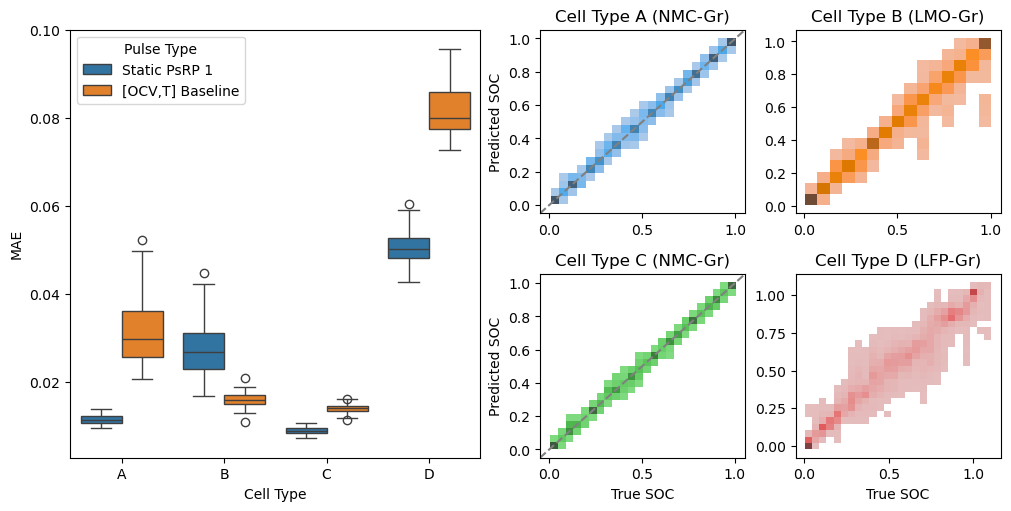

In [11]:
colors = {
    "A": (50/225, 116/225, 161/225),
    "B": (225/225, 129/225, 44/225),
    "C": (58/225, 146/225, 58/225),
    "D": (192/225, 61/225, 62/225),
}

gs_kw = dict(width_ratios=[2,1,1], height_ratios=[1, 1])
fig, axd = plt.subplot_mosaic([['left', 'upper middle', 'upper right'],
                               ['left', 'lower middle', 'lower right']],
                              gridspec_kw=gs_kw, figsize=(10, 5),
                              layout="constrained")
sns.boxplot(t(metrics, 'SOC', ['[OCV,T] Baseline', 'Static PsRP 1']), x='Cell ID', y='mae', hue='Pulse Type', ax=axd['left'])
sns.histplot(x=a_soc_true_pred['True'], y=a_soc_true_pred['Predicted'], ax=axd['upper middle'], color=colors['A'])
sns.histplot(x=b_soc_true_pred['True'], y=b_soc_true_pred['Predicted'], ax=axd['upper right'], color=colors['B'])
sns.histplot(x=c_soc_true_pred['True'], y=c_soc_true_pred['Predicted'], ax=axd['lower middle'], color=colors['C'])
sns.histplot(x=d_soc_true_pred['True'], y=d_soc_true_pred['Predicted'], ax=axd['lower right'], color=colors['D'])
axd['upper middle'].axline((0,0),(1,1), color='grey', linestyle='dashed')
axd['lower middle'].axline((0,0),(1,1), color='grey', linestyle='dashed')
axd['left'].set_ylabel("MAE");
axd['left'].set_xlabel("Cell Type")
axd['upper middle'].set_title('Cell Type A (NMC-Gr)')
axd['upper right'].set_title('Cell Type B (LMO-Gr)')
axd['lower middle'].set_title('Cell Type C (NMC-Gr)')
axd['lower right'].set_title('Cell Type D (LFP-Gr)');

axd['lower middle'].set_xlabel("True SOC")
axd['lower right'].set_xlabel("True SOC")
axd['lower middle'].set_ylabel("Predicted SOC")
axd['upper middle'].set_ylabel("Predicted SOC")
axd['upper right'].set_xlabel("")
axd['upper middle'].set_xlabel("")
axd['upper right'].set_ylabel("")
axd['lower right'].set_ylabel("")
# fig.savefig("predicting_soc.png")

## 2.4: Diagnostic accuracy depends on the application

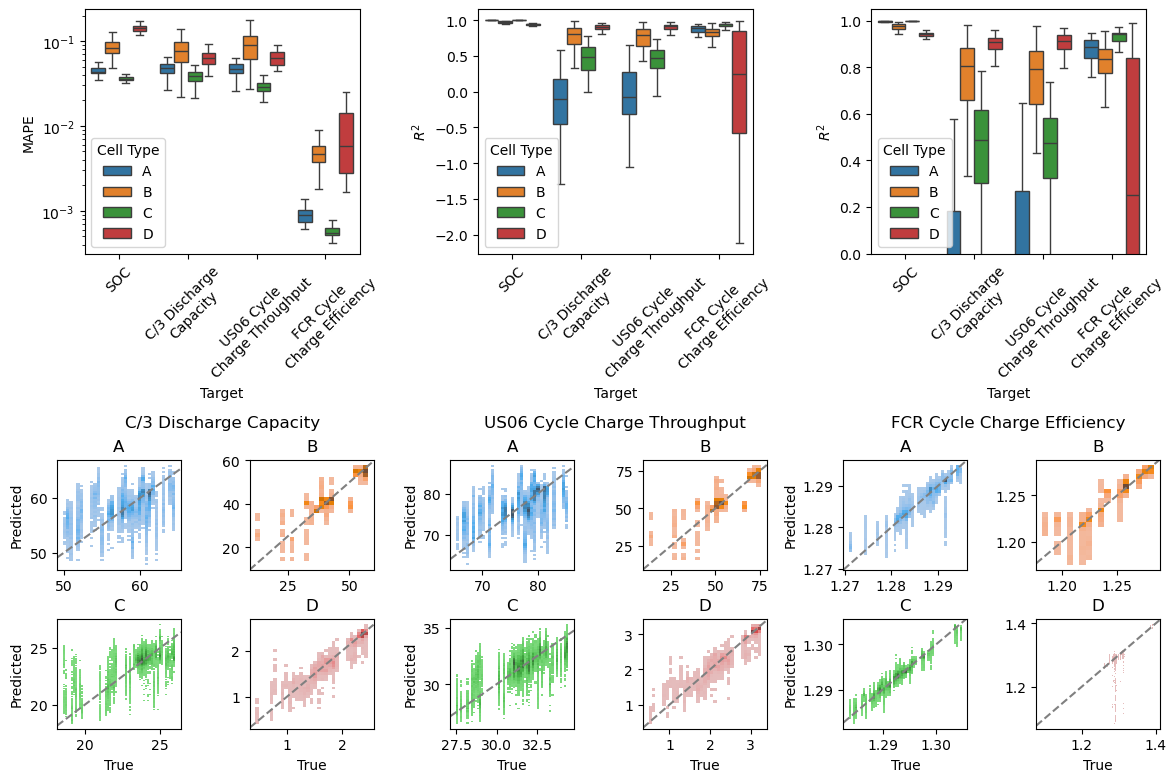

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(12,8))
sns.boxplot(metrics[metrics['Pulse Type'] == 'Static PsRP 1'], x='Target', y='mape', hue='Cell ID', showfliers=False, ax=ax[0,0])
sns.boxplot(metrics[metrics['Pulse Type'] == 'Static PsRP 1'], x='Target', y='r2', hue='Cell ID', showfliers=False, ax=ax[0,1])
sns.boxplot(metrics[metrics['Pulse Type'] == 'Static PsRP 1'], x='Target', y='r2', hue='Cell ID', showfliers=False, ax=ax[0,2])
for i in range(3):
    ax[0, i].tick_params("x", rotation=45);
    ax[0, i].legend(title='Cell Type', loc='lower left')
ax[0,0].set_yscale('log')
ax[0,0].set_ylabel("MAPE");
ax[0,1].set_ylabel(r"$R^2$")
ax[0,2].set_ylabel(r"$R^2$")
ax[0,2].set_ylim([0, 1.05])
colors = {
    "A": (50/225, 116/225, 161/225),
    "B": (225/225, 129/225, 44/225),
    "C": (58/225, 146/225, 58/225),
    "D": (192/225, 61/225, 62/225),
}
targets = ['C/3 discharge capacity', 'Charge depleting cycle charge throughput', 'Charge sustaining cycle charge efficiency']
target_names = {
    'C/3 discharge capacity': 'C/3 Discharge Capacity',
    'Charge depleting cycle charge throughput': 'US06 Cycle Charge Throughput',
    'Charge sustaining cycle charge efficiency': 'FCR Cycle Charge Efficiency'
}
for i in range(3):
    a_true_pred = get_true_pred_metadata(A, targets[i], ['Static PsRP 1'])
    b_true_pred = get_true_pred_metadata(B, targets[i], ['Static PsRP 1'])
    c_true_pred = get_true_pred_metadata(C, targets[i], ['Static PsRP 1'])
    d_true_pred = get_true_pred_metadata(D, targets[i], ['Static PsRP 1'])
    
    ax[1, i].set_title(target_names[targets[i]])
    ax[1, i].axis('off')
    
    ax_in = ax[1,i].inset_axes([-0.1, 0.45, 0.45, 0.45])
    sns.histplot(x=a_true_pred['True'], y=a_true_pred['Predicted'], ax=ax_in, color=colors['A'], label="A")
    ax_in.set_title("A")
    ax_in.axline((a_true_pred['True'].min(),a_true_pred['True'].min()), slope=1, linestyle='dashed', color='grey')
    ax_in.set_xlabel("")
    
    ax_in = ax[1,i].inset_axes([0.6, 0.45, 0.45, 0.45])
    sns.histplot(x=b_true_pred['True'], y=b_true_pred['Predicted'], ax=ax_in, color=colors['B'], label="B", legend=True)
    ax_in.set_title("B")
    ax_in.axline((b_true_pred['True'].min(), b_true_pred['True'].min()), slope=1, linestyle='dashed', color='grey')
    ax_in.set_ylabel("")
    ax_in.set_xlabel("")
    
    ax_in = ax[1,i].inset_axes([-0.1, -0.2, 0.45, 0.45])
    sns.histplot(x=c_true_pred['True'], y=c_true_pred['Predicted'], ax=ax_in, color=colors['C'], label='C')
    ax_in.set_title("C")
    ax_in.axline((c_true_pred['True'].min(),c_true_pred['True'].min()), slope=1, linestyle='dashed', color='grey')

    ax_in = ax[1,i].inset_axes([0.6, -0.2, 0.45, 0.45])
    sns.histplot(x=d_true_pred['True'], y=d_true_pred['Predicted'], ax=ax_in, color=colors["D"], label="D")
    ax_in.set_title("D")
    ax_in.axline((d_true_pred['True'].min(),d_true_pred['True'].min()), slope=1, linestyle='dashed', color='grey')
    ax_in.set_ylabel("")

fig.tight_layout()
# fig.savefig("comparing_targets.png")

### Table 2: Safety and Physical Target Results

In [13]:
def get_scores(pulses, targets, results_dict, n_splits=50):
    r2s_mean = []
    maes_mean = []
    mapes_mean = []
    
    r2s_std = []
    maes_std = []
    mapes_std = []
    
    for i, pulse in enumerate(pulses):
        for j, target in enumerate(targets):
            df = results_dict[f"{target}, {pulse}"]

            r2s, maes, mapes = [], [], []
            for run in range(n_splits):
                test_subset = df[df[run].notna()]
                r2 = r2_score(test_subset[target], test_subset[run])
                mae = mean_absolute_error(test_subset[target], test_subset[run])
                mape = mean_absolute_percentage_error(test_subset[target], test_subset[run])
                r2s.append(r2)
                maes.append(mae)
                mapes.append(mape)

            r2s_mean.append(np.mean(r2s))
            maes_mean.append(np.mean(maes))
            mapes_mean.append(np.mean(mapes))
            r2s_std.append(np.std(r2s))
            maes_std.append(np.std(maes))
            mapes_std.append(np.std(mapes))
    
    return {'r2': {'mean': r2s_mean, 'std': r2s_std},
            'mae': {'mean': maes_mean, 'std': maes_std},
            'mape': {'mean': mapes_mean, 'std': mapes_std}}

def get_classification_scores(pulse, target, result_dict, display_labels=[], n_splits=50, xlabel='', ylabel=''):
    df = result_dict[f"{target}, {pulse}"]
    average_pred = df[list(range(n_splits))].max(axis=1)
    print(classification_report(df[target], average_pred.round()))

In [14]:
a = get_scores(['Static PsRP 1'], ["Thickness growth"], A_volume)
c = get_scores(['Static PsRP 1'], ["Thickness growth"], C_volume)
d = get_scores(['Static PsRP 1'], ["Thickness growth"], D_volume)

print("Thickness growth")
display(pd.DataFrame({
    'Cell Type A': [f"{a['r2']['mean'][0].round(2)} +/- {a['r2']['std'][0].round(2)}",
          f"{a['mae']['mean'][0].round(2)} +/- {a['mae']['std'][0].round(2)}"],
    'Cell Type C': [f"{c['r2']['mean'][0].round(2)} +/- {c['r2']['std'][0].round(2)}",
          f"{c['mae']['mean'][0].round(2)} +/- {c['mae']['std'][0].round(2)}"],
    'Cell Type D': [f"{d['r2']['mean'][0].round(4)} +/- {d['r2']['std'][0].round(4)}",
          f"{d['mae']['mean'][0].round(4)} +/- {d['mae']['std'][0].round(4)}"]
}, index=[r'$R^2$', 'MAE']))

a = get_scores(['Static PsRP 1'], ["Volume growth"], A_volume)
c = get_scores(['Static PsRP 1'], ["Volume growth"], C_volume)
d = get_scores(['Static PsRP 1'], ["Volume growth"], D_volume)

print("Volume growth")
display(pd.DataFrame({
    'Cell Type A': [f"{a['r2']['mean'][0].round(2)} +/- {a['r2']['std'][0].round(2)}",
          f"{a['mae']['mean'][0].round(2)} +/- {a['mae']['std'][0].round(2)}"],
    'Cell Type C': [f"{c['r2']['mean'][0].round(2)} +/- {c['r2']['std'][0].round(2)}",
          f"{c['mae']['mean'][0].round(2)} +/- {c['mae']['std'][0].round(2)}"],
    'Cell Type D': [f"{d['r2']['mean'][0].round(4)} +/- {d['r2']['std'][0].round(4)}",
          f"{d['mae']['mean'][0].round(4)} +/- {d['mae']['std'][0].round(4)}"]
}, index=[r'$R^2$', 'MAE']))

print("Excess electrolyte, C")
get_classification_scores('Static PsRP 1', 'Excess electrolyte', C_elec, xlabel='Predicted presence of excess electrolyte', ylabel='True presence of excess electrolyte', display_labels=['Minimal', 'No', 'Yes'])

print("Excess electrolyte, D")
get_classification_scores('Static PsRP 1', 'Excess electrolyte', D_elec, xlabel='Predicted presence of excess electrolyte', ylabel='True presence of excess electrolyte',display_labels=['No', 'Yes'])

print("Safety, 1C, A")
get_classification_scores('Static PsRP 1', 'Post 1C charge relaxation fit MSE_outlier', A_safety_1c, display_labels=['Not outlier', 'Outlier'])

print("Safety, 1C, B")
get_classification_scores('Static PsRP 1', 'Post 1C charge relaxation fit MSE_outlier', B_safety_1c, display_labels=['Not outlier', 'Outlier'])

print("Safety, 1C, C")
get_classification_scores('Static PsRP 1', 'Post 1C charge relaxation fit MSE_outlier', C_safety_1c, display_labels=['Not outlier', 'Outlier'])

Thickness growth


,Cell Type A,Cell Type C,Cell Type D
$R^2$,-0.31 +/- 0.66,-0.46 +/- 0.52,-0.1117 +/- 0.4222
MAE,0.02 +/- 0.0,0.04 +/- 0.01,0.005 +/- 0.0008


Volume growth


,Cell Type A,Cell Type C,Cell Type D
$R^2$,-0.13 +/- 0.57,-0.48 +/- 0.74,-0.3992 +/- 0.4843
MAE,0.11 +/- 0.02,0.05 +/- 0.01,0.0017 +/- 0.0003


Excess electrolyte, C
              precision    recall  f1-score   support

         0.0       0.66      0.33      0.44       591
         1.0       0.09      0.10      0.09        90
         2.0       0.34      0.67      0.45       298

    accuracy                           0.41       979
   macro avg       0.36      0.37      0.33       979
weighted avg       0.51      0.41      0.41       979

Excess electrolyte, D
              precision    recall  f1-score   support

           0       0.83      0.73      0.77       711
           1       0.72      0.82      0.77       607

    accuracy                           0.77      1318
   macro avg       0.77      0.78      0.77      1318
weighted avg       0.78      0.77      0.77      1318

Safety, 1C, A
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.89       844
         1.0       0.00      0.00      0.00        78

    accuracy                           0.80       922
   macro avg    

## 2.5 Complex pulses contain more information than simple pulses

In [15]:
metrics_ = metrics.replace("Static HPPC", "Static\nHPPC")
metrics_ = metrics_.replace("[OCV,T] Baseline", "[OCV,T]\nBaseline")
metrics_ = metrics_.replace("Static PsRP 1", "Static\nPsRP 1")
metrics_= metrics_.replace("Dynamic PsRP 1 1C", "Dynamic\nPsRP 1 1C")

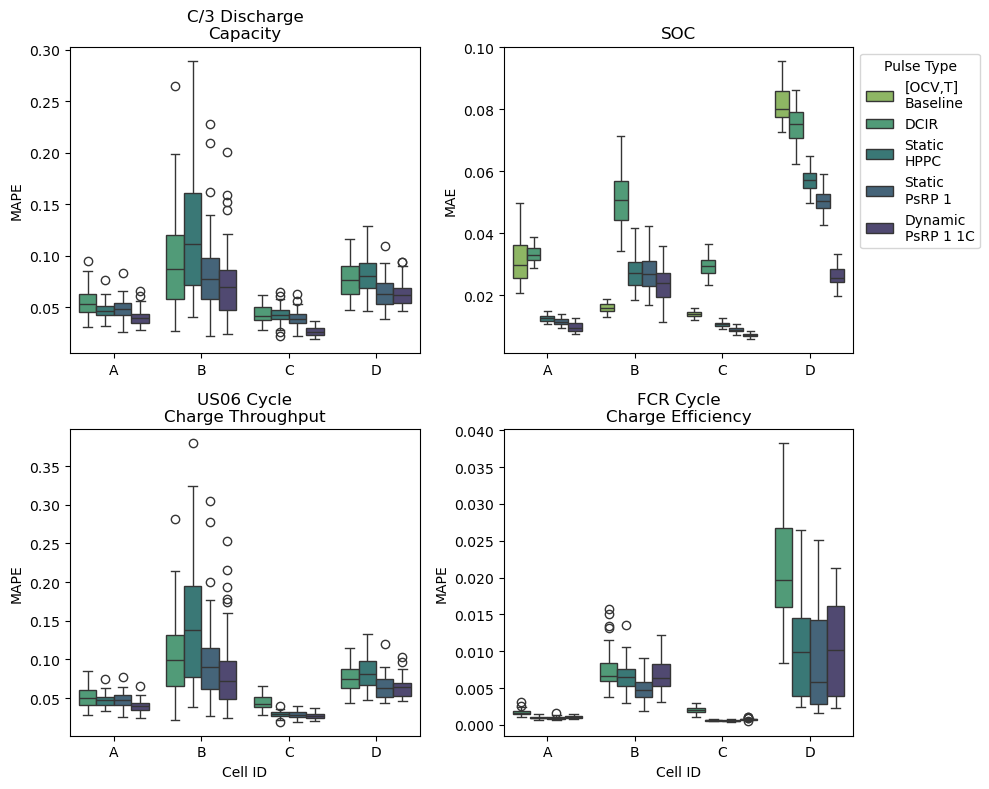

In [16]:
metrics_dcir_ = metrics_[metrics_['Pulse Type'] == 'DCIR']
metrics_ = pd.concat([metrics_dcir_, metrics_[metrics_['Pulse Type'] != 'DCIR']])
metrics_ocv_ = metrics_[metrics_['Pulse Type'] == '[OCV,T]\nBaseline']
metrics_ = pd.concat([metrics_ocv_, metrics_[metrics_['Pulse Type'] != '[OCV,T]\nBaseline']])

palette = {
    'Static\nHPPC': '#2F837F',
    'Static\nPsRP 1': '#3C6682',
    'Dynamic\nPsRP 1 1C': '#4B4278',
    '[OCV,T]\nBaseline': '#8FC456',
    'DCIR': '#45A778'
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
axes = axes.ravel()
for i, target in enumerate(['C/3 Discharge\nCapacity', 'SOC', 'US06 Cycle\nCharge Throughput',
       'FCR Cycle\nCharge Efficiency']):
    showfliers=True
    legend=False
    if target == 'SOC':
        showfliers=False
    if i == 1:
        legend="full"
    if target == "SOC":
        metric = 'mae'
        pulses = ['Static\nHPPC', 'Static\nPsRP 1', 'Dynamic\nPsRP 1 1C', 'DCIR', '[OCV,T]\nBaseline']
    else:
        metric = 'mape'
        pulses = ['Static\nHPPC', 'Static\nPsRP 1', 'Dynamic\nPsRP 1 1C', 'DCIR']
    sns.boxplot(t(metrics_, target, pulses), legend=legend,
                x='Cell ID', y=metric, hue='Pulse Type',
                showfliers=showfliers, ax=axes[i], palette=palette)
    axes[i].set_title(target)
for ax in axes:
    ax.set_ylabel("MAPE")

axes[1].set_ylabel("MAE")
axes[1].legend(title='Pulse Type')
sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))
axes[0].set(xlabel=None)
axes[1].set(xlabel=None)
fig.tight_layout()
# fig.savefig("comparing_pulse_types_dcir.png")

Simpler plot for AABC presentation

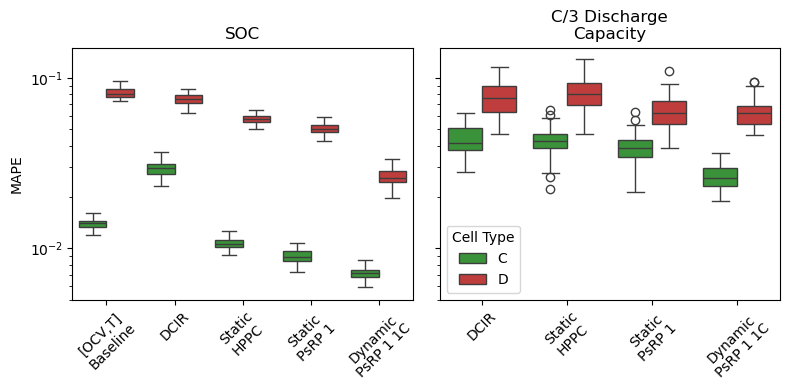

In [21]:
palette = plt.cm.tab10.colors[2:4]

metrics_dcir_ = metrics_[metrics_['Pulse Type'] == 'DCIR']
metrics_ = pd.concat([metrics_dcir_, metrics_[metrics_['Pulse Type'] != 'DCIR']])
metrics_ocv_ = metrics_[metrics_['Pulse Type'] == '[OCV,T]\nBaseline']
metrics_ = pd.concat([metrics_ocv_, metrics_[metrics_['Pulse Type'] != '[OCV,T]\nBaseline']])

metrics_CD = metrics_[metrics_['Cell ID'].isin(['C','D'])]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
axes = axes.ravel()
for i in range(2):
    axes[i].tick_params("x", rotation=45)

for i, target in enumerate(['SOC', 'C/3 Discharge\nCapacity']):
    showfliers=True
    legend=False
    if target == 'SOC':
        showfliers=False
    if i == 1:
        legend="full"
    if target == "SOC":
        metric = 'mae'
        pulses = ['Static\nHPPC', 'Static\nPsRP 1', 'Dynamic\nPsRP 1 1C', 'DCIR', '[OCV,T]\nBaseline']
    else:
        metric = 'mape'
        pulses = ['Static\nHPPC', 'Static\nPsRP 1', 'Dynamic\nPsRP 1 1C', 'DCIR']
    sns.boxplot(t(metrics_CD, target, pulses), legend=legend,
                x='Pulse Type', y=metric, hue='Cell ID', palette=palette,
                showfliers=showfliers, ax=axes[i])
    axes[i].set_title(target)
for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim([5e-3, 1.5e-1])

axes[0].set_ylabel("MAPE")
axes[1].set_ylabel("")
axes[1].set_yticklabels("")
axes[1].legend(title='Cell Type')
# sns.move_legend(axes[1], "upper left", bbox_to_anchor=(1, 1))
axes[0].set(xlabel=None)
axes[1].set(xlabel=None)
fig.tight_layout()
# fig.savefig("comparing_pulse_types_dcir.png")

## 2.6 Systematic errors due to health, temperature, and pulse current

In [10]:
# Plots using 1C discharge capacity, HPPC, cell type C

a_metadata = get_true_pred_metadata(A, '1C discharge capacity', ['Static HPPC'])
b_metadata = get_true_pred_metadata(B, '1C discharge capacity', ['Static HPPC'])
c_metadata = get_true_pred_metadata(C, '1C discharge capacity', ['Static HPPC'])
d_metadata = get_true_pred_metadata(D, '1C discharge capacity', ['Static HPPC'])

In [91]:
plt.rcParams.update({'font.size': 18})

In [11]:
def plot_errors(df, target, cell_id):
    
    df_metadata = get_true_pred_metadata(df, target, ['Static HPPC'])
#     df_metadata = df_metadata.replace("C/10", 0.10)
#     df_metadata = df_metadata.replace("C/2", 0.5)
#     df_metadata = df_metadata.replace("1C", 1)
#     df_metadata = df_metadata.replace("2C", 2)

    
    fig, axes = plt.subplots(1, 4, figsize=(16,4))
    axes = axes.ravel()
    
    # Effect of temperature
    sns.histplot(df_metadata, x='Temperature', y='Residual', ax=axes[0])
    axes[0].hlines(xmin=axes[0].get_xlim()[0], xmax=axes[0].get_xlim()[1], y=0, linestyle='dashed', color='grey')
    axes[0].set_ylabel("Residual (Ah)")
    
    # Effect of rate
    # v1
    df_metadata['abs(Residual)'] = abs(df_metadata['Residual'])
    m = df_metadata.groupby('C-rate').mean().loc[['C/10', 'C/2', '1C', '2C']]
    yerr = df_metadata.groupby('C-rate').std().loc[['C/10', 'C/2', '1C', '2C']]
    axes[1].errorbar(m.index, m['abs(Residual)'], fmt='o', yerr=yerr['abs(Residual)'], capsize=5)   
    axes[1].set_xlabel("C-rate") # , size='xx-large')
    axes[1].set_ylabel("MAE (Ah)") # , size='xx-large')
#     axes[1].set_xticklabels(axes[1].get_xticklabels(), size='xx-large')
#     axes[1].set_yticklabels(axes[1].get_yticklabels(), size='xx-large')
    axes[2].errorbar(m.index, m['abs(Residual)'], fmt='o')
    
    # Effect of SOC
    sns.histplot(df_metadata, x='SOC', y='Residual', ax=axes[3])
    axes[3].hlines(xmin=0, xmax=1, y=0, linestyle='dashed', color='grey')
    axes[3].set_ylabel("Residual (Ah)")
    
    fig.tight_layout()
    return fig

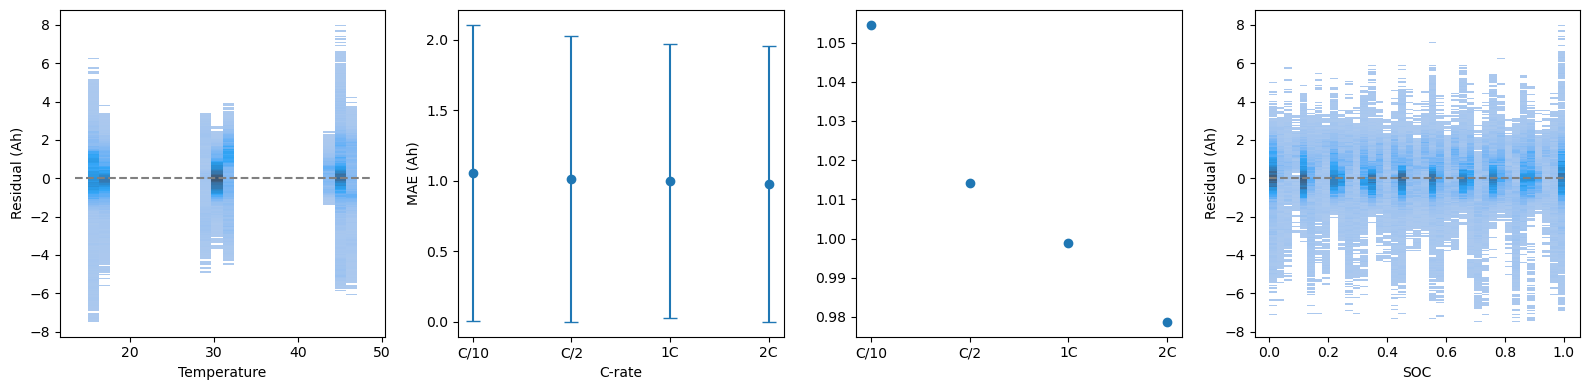

In [12]:
fig = plot_errors(C, '1C discharge capacity', 'C')
fig.savefig("systematic_errors_c_1c.png")

C/3 discharge capacity
Charge sustaining cycle charge efficiency


C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_10384\852204058.py:72: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = np.sqrt(np.diag(cov))


soc


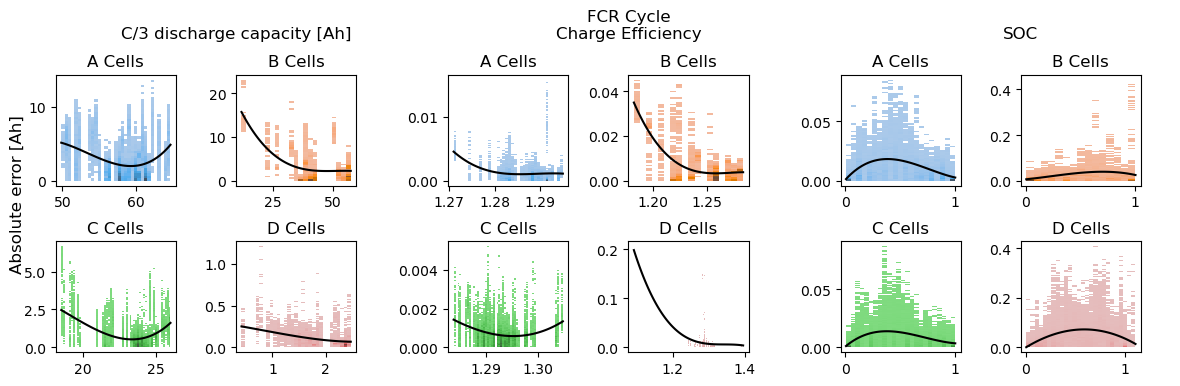

In [144]:
titles = {
    'Charge depleting cycle charge throughput': 'US06 Cycle\nCharge Throughput',
    'Charge sustaining cycle charge efficiency': 'FCR Cycle\nCharge Efficiency',
    'soc': 'SOC',
    'C/3 discharge capacity': 'C/3 discharge capacity [Ah]',
}

colors = {
    "A": (50/225, 116/225, 161/225),
    "B": (225/225, 129/225, 44/225),
    "C": (58/225, 146/225, 58/225),
    "D": (192/225, 61/225, 62/225),
}

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

def plot_abs_error_vs_soh(results_list, target, pulse, ax):
    print(target)
    X, y = [], []
    for results in results_list:
        df = results[f"{target}, {pulse}"]
        for i in range(50):
            chunk = df[df[i].notna()]
            abs_error = abs(chunk[target] - chunk[i])
            X += chunk[target].values.tolist()
            y += abs_error.values.tolist()
    ax.scatter(X, y, color='tab:blue')

    z = np.poly1d(np.polyfit(X, y, 3))
    X_pred = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    y_pred = z(X_pred)
    
    ax.plot(X_pred, y_pred, color='tab:orange', label='Polynomial fit (d=3)')
    ax.set_xlabel(f"{titles[target]}")
    ax.legend()
    
def plot_abs_error_vs_soh_cells_separate(results_list, cell_type_names_list, target, pulse, ax):
    
    print(target)

    ax.axis('off')
    ax_0 = ax.inset_axes([-0.1, 0.5, 0.4, 0.4])
    ax_1 = ax.inset_axes([0.5, 0.5, 0.4, 0.4])
    ax_2 = ax.inset_axes([-0.1, -0.1, 0.4, 0.4])
    ax_3 = ax.inset_axes([0.5, -0.1, 0.4, 0.4])
    
    axes = [ax_0, ax_1, ax_2, ax_3]
    
    for j, results in enumerate(results_list):
        X, y = [], []
        df = results[f"{target}, {pulse}"]
        for i in range(50):
            chunk = df[df[i].notna()]
            abs_error = abs(chunk[target] - chunk[i])
            X += chunk[target].values.tolist()
            y += abs_error.values.tolist()
        sns.histplot(ax=axes[j], x=X, y=y, color=colors[cell_type_names_list[j]])
        axes[j].set_title(f"{cell_type_names_list[j]} Cells")

        n = 3
        pfit, cov = np.polyfit(X, y, 3, cov=True)
        uncertainty = np.sqrt(np.diag(cov))
        z = np.poly1d(pfit)
        X_pred = np.linspace(min(X), max(X), 100)
        y_pred = z(X_pred.reshape(-1, 1))
        
        TT = np.vstack([X_pred**(n-i) for i in range(n+1)]).T
        yi = np.dot(TT, pfit)  # matrix multiplication calculates the polynomial values
        C_yi = np.dot(TT, np.dot(cov, TT.T)) # C_y = TT*C_z*TT.T
        sig_yi = np.sqrt(np.diag(C_yi))  # Standard deviations are sqrt of diagonal
      
        axes[j].plot(X_pred, y_pred, color='black', label='Polynomial fit (d=3)')

pulse = "Static PsRP 1"
fig, ax = plt.subplots(1,3, figsize=(12,4))
targets = ["C/3 discharge capacity", "Charge sustaining cycle charge efficiency"]
ax = ax.ravel()
for i, target in enumerate(targets):
    plot_abs_error_vs_soh_cells_separate([A, B, C, D], ['A', 'B', 'C', 'D'], target, pulse, ax[i])
    ax[i].set_title(titles[target])
    ax[i].set_xlabel(titles[target])
    ax[i].set_ylabel("Absolute error")
plot_abs_error_vs_soh_cells_separate([A_soc, B_soc, C_soc, D_soc], ['A', 'B', 'C', 'D'], 'soc', pulse, ax[-1])
ax[-1].set_title("SOC")
fig.supylabel("Absolute error [Ah]")
fig.tight_layout()
plt.show()
fig.savefig("systematic_errors_soh_separate_cells.png")

## 3.1 Usefulness of capacity prediction as a rapid screening method for second-life sorting

In [15]:
def get_cm(pulse, target, result_dict, n_splits=50):
    df = result_dict[f"{target}, {pulse}"]
    average_pred = df[list(range(n_splits))].mean(axis=1)
    cm = confusion_matrix(df[target], average_pred.round())
    cm = cm / cm.sum()
    return cm

def get_cm_all_cell_types(pulse, target, result_dicts, n_splits=50):
    results = {"Target": [], "Preds": []}
    for result_dict in result_dicts:
        df = result_dict[f"{target}, {pulse}"]
        average_pred = df[list(range(n_splits))].mean(axis=1)
        results['Target'] = results['Target'] +  df[target].to_list()
        results['Preds'] += average_pred.round().to_list()
    cm = confusion_matrix(results["Target"], results["Preds"])
    cm = cm / cm.sum()
    return cm

In [16]:
cm_A = get_cm('Static PsRP 1', '1C discharge capacity_3bins', A_cap_class)
cm_B = get_cm('Static PsRP 1', '1C discharge capacity_3bins', B_cap_class)
cm_C = get_cm('Static PsRP 1', '1C discharge capacity_3bins', C_cap_class)
cm_D = get_cm('Static PsRP 1', '1C discharge capacity_3bins', D_cap_class)
cm_all = get_cm_all_cell_types('Static PsRP 1', '1C discharge capacity_3bins', [A_cap_class, B_cap_class, C_cap_class, D_cap_class])

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_2256\1978718571.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


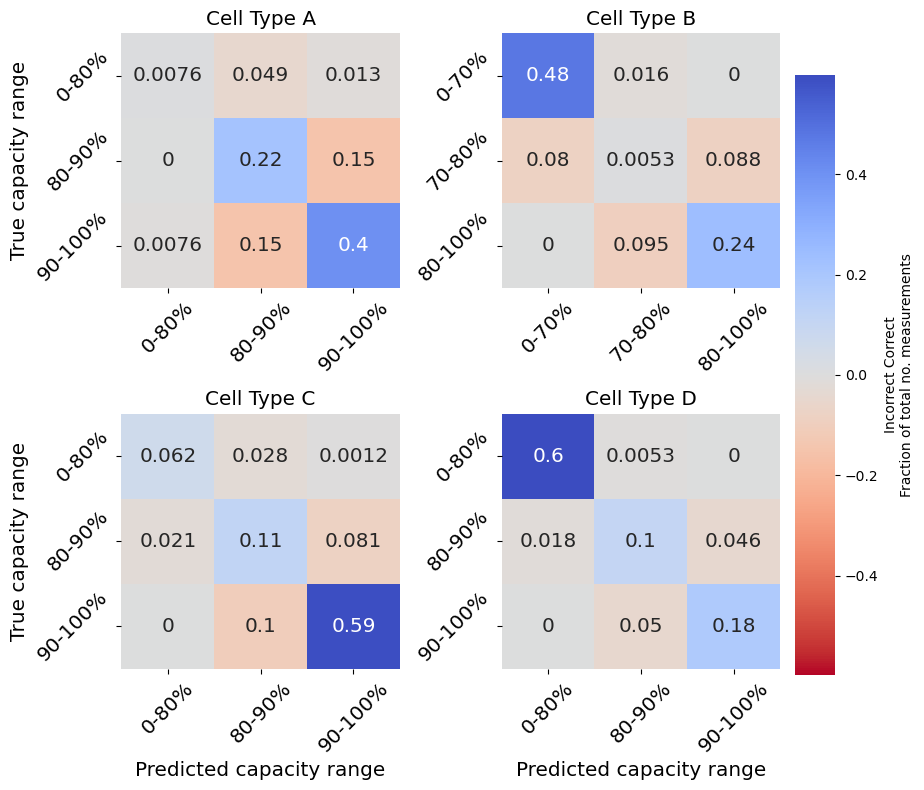

In [38]:
cmap = 'coolwarm_r'

size='x-large'
xsize = 'x-large'

cbar_max = np.max([cm_D, cm_C, cm_B, cm_A])
cbar_min = -1 * cbar_max

fig, axes = plt.subplots(2,2, figsize=(8,8))
cax = fig.add_axes([1, 0.15, 0.05, 0.75]) 
axes = axes.ravel()
cm_A_ = cm_A * (np.diag([2,2,2]) - 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_A_, display_labels=['0-80%', '80-90%', '90-100%'])
ax = sns.heatmap(cm_A_, annot=cm_A, cmap='coolwarm_r', ax=axes[0], center=0, vmin=cbar_min, vmax=cbar_max, cbar=False,
                 annot_kws={"size":xsize})

cm_B_ = cm_B * (np.diag([2,2,2]) - 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_B_, display_labels=['0-70%', '70-80%', '80-100%'])
sns.heatmap(cm_B_, annot=cm_B, cmap='coolwarm_r', ax=axes[1], center=0, vmin=cbar_min, vmax=cbar_max, cbar=False,
            annot_kws={"size":xsize})

cm_C_ = cm_C * (np.diag([2,2,2]) - 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_C_, display_labels=['0-80%', '80-90%', '90-100%'])
sns.heatmap(cm_C_, annot=cm_C, cmap='coolwarm_r', ax=axes[2], center=0, vmin=cbar_min, vmax=cbar_max, cbar=False,
           annot_kws={"size":xsize})

cm_D_ = cm_D * (np.diag([2,2,2]) - 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_D_, display_labels=['0-80%', '80-90%', '90-100%'])
sns.heatmap(cm_D_, annot=cm_D, cmap='coolwarm_r', ax=axes[3], center=0, vmin=cbar_min, vmax=cbar_max, cbar_ax=cax,
           cbar_kws={'label': 'Incorrect Correct\nFraction of total no. measurements',},
            annot_kws={"size":xsize})

for ax in axes:
    ax.tick_params('x', rotation=45)
    ax.tick_params('y', rotation=45)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_xticklabels(['0-80%', '80-90%', '90-100%'], size=size)
    ax.set_yticklabels(['0-80%', '80-90%', '90-100%'], size=size)
axes[0].set_title("Cell Type A", size=size)
axes[1].set_title("Cell Type B", size=size)
axes[2].set_title("Cell Type C", size=size)
axes[3].set_title("Cell Type D", size=size)
axes[1].set_xticklabels(['0-70%', '70-80%', '80-100%'], size=size)
axes[1].set_yticklabels(['0-70%', '70-80%', '80-100%'], size=size)
axes[0].set_ylabel("True capacity range", size=size)
axes[2].set_ylabel("True capacity range", size=size)
axes[2].set_xlabel("Predicted capacity range", size=size)
axes[3].set_xlabel("Predicted capacity range", size=size)
fig.tight_layout()
plt.savefig('capacity_classification_4.png',dpi=300, bbox_inches = "tight")

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_2256\2915222643.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


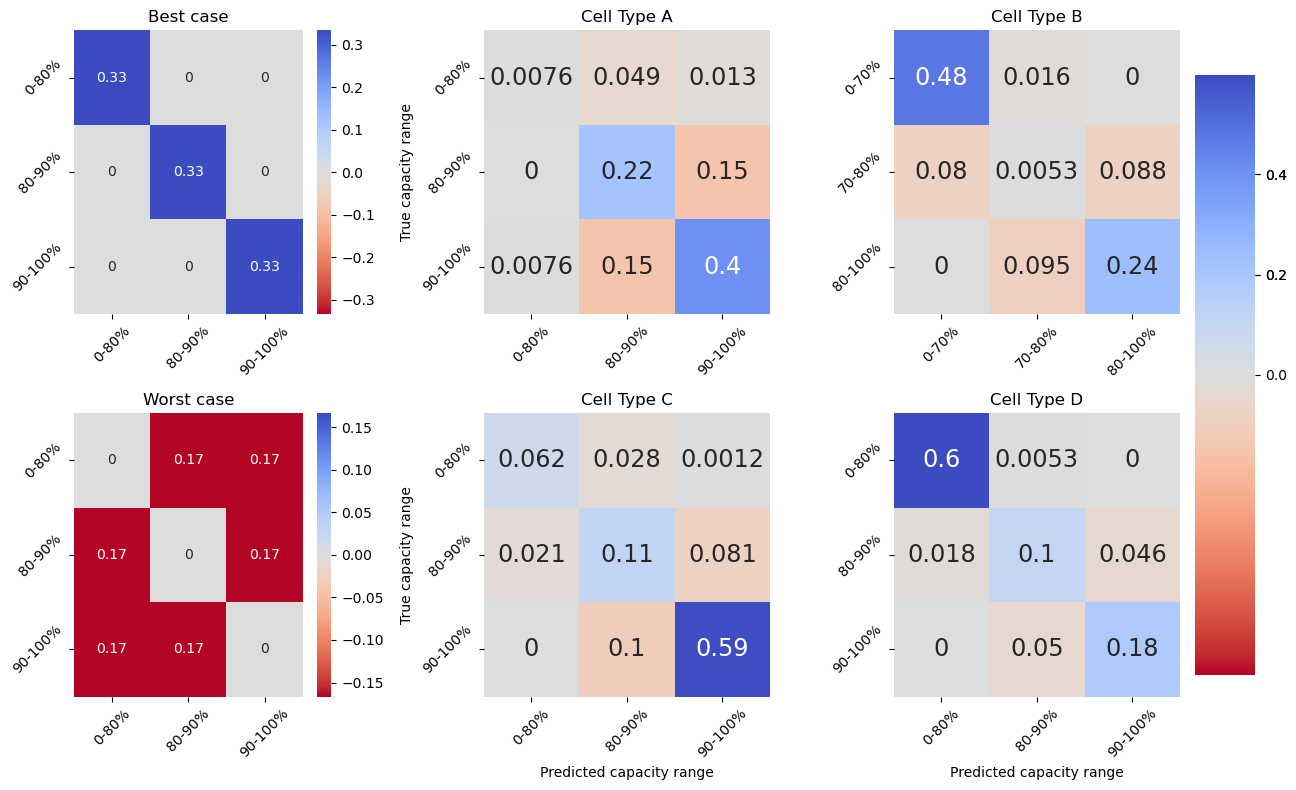

In [23]:
cmap = 'coolwarm_r'

cbar_max = np.max([cm_D, cm_C, cm_B, cm_A])
cbar_min = -1 * cbar_max

fig, axes = plt.subplots(2,3, figsize=(12,8))
cax = fig.add_axes([1, 0.15, 0.05, 0.75]) 
axes = axes.ravel()


cm = -1 * np.array([[0,1,1],[1,0,1],[1,1,0]]) / 6
divnorm = TwoSlopeNorm(vmin=-1*abs(cm).max(), vcenter=0, vmax=abs(cm).max())
sns.heatmap(cm, annot=abs(cm), cmap='coolwarm_r', norm=divnorm, ax=axes[3])
axes[3].set_xticklabels(['Bad', 'Okay', 'Good'])  # (['0-80%', '80-90%', '90-100%'])
axes[3].set_yticklabels(['Bad', 'Okay', 'Good'])  # (['0-80%', '80-90%', '90-100%'])
axes[3].set_xlabel('Predicted capacity range')
axes[3].set_ylabel("True capacity range")
axes[3].set_title("Worst case")

cm = np.diag([1,1,1]) / 3
divnorm = TwoSlopeNorm(vmin=-1*abs(cm).max(), vcenter=0, vmax=abs(cm).max())
sns.heatmap(cm, annot=abs(cm), cmap='coolwarm_r', norm=divnorm, ax=axes[0])
axes[0].set_xticklabels(['Bad', 'Okay', 'Good'])  # ['0-80%', '80-90%', '90-100%'])
axes[0].set_yticklabels(['Bad', 'Okay', 'Good'])  # ['0-80%', '80-90%', '90-100%'])
axes[0].set_xlabel('Predicted capacity range')
axes[0].set_ylabel("True capacity range")
axes[0].set_title("Best case")


cm_A_ = cm_A * (np.diag([2,2,2]) - 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_A_, display_labels=['0-80%', '80-90%', '90-100%'])
ax = sns.heatmap(cm_A_, annot=cm_A, cmap='coolwarm_r', ax=axes[1], center=0, vmin=cbar_min, vmax=cbar_max, cbar=False,
                annot_kws={"size":size})

cm_B_ = cm_B * (np.diag([2,2,2]) - 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_B_, display_labels=['0-70%', '70-80%', '80-100%'])
sns.heatmap(cm_B_, annot=cm_B, cmap='coolwarm_r', ax=axes[2], center=0, vmin=cbar_min, vmax=cbar_max, cbar=False,
           annot_kws={"size":size})

cm_C_ = cm_C * (np.diag([2,2,2]) - 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_C_, display_labels=['0-80%', '80-90%', '90-100%'])
sns.heatmap(cm_C_, annot=cm_C, cmap='coolwarm_r', ax=axes[4], center=0, vmin=cbar_min, vmax=cbar_max, cbar=False,
           annot_kws={"size":size})

cm_D_ = cm_D * (np.diag([2,2,2]) - 1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_D_, display_labels=['0-80%', '80-90%', '90-100%'])
sns.heatmap(cm_D_, annot=cm_D, cmap='coolwarm_r', ax=axes[5], center=0, vmin=cbar_min, vmax=cbar_max, cbar_ax=cax,
            cbar_kws={'ticks': [0.4, 0.2, 0.0, 0.2, 0.4]}, annot_kws={"size":size})

for ax in axes:
    ax.tick_params('x', rotation=45)
    ax.tick_params('y', rotation=45)
    ax.set(xlabel=None)
    ax.set(ylabel=None)
    ax.set_xticklabels(['0-80%', '80-90%', '90-100%'])
    ax.set_yticklabels(['0-80%', '80-90%', '90-100%'])
axes[1].set_title("Cell Type A")
axes[2].set_title("Cell Type B")
axes[4].set_title("Cell Type C")
axes[5].set_title("Cell Type D")
axes[2].set_xticklabels(['0-70%', '70-80%', '80-100%'])
axes[2].set_yticklabels(['0-70%', '70-80%', '80-100%'])
axes[1].set_ylabel("True capacity range")
axes[4].set_ylabel("True capacity range")
axes[4].set_xlabel("Predicted capacity range")
axes[5].set_xlabel("Predicted capacity range")
fig.tight_layout()
plt.savefig('capacity_classification.png',dpi=300, bbox_inches = "tight")

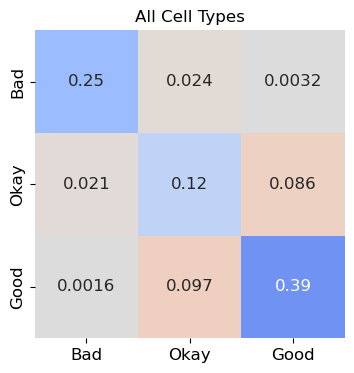

In [37]:
size='large'
cm_all_ = cm_all * (np.diag([2,2,2]) - 1)
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(cm_all_, annot=cm_all, cmap='coolwarm_r', center=0, vmin=cbar_min, vmax=cbar_max, cbar=False,
                annot_kws={"size":size})
ax.set_xticklabels(['Bad', 'Okay', 'Good'], size=size)
ax.set_yticklabels(['Bad', 'Okay', 'Good'], size=size)
ax.set_title("All Cell Types")
fig.savefig("capacity_classification_all.png")

## 2.7 Safety

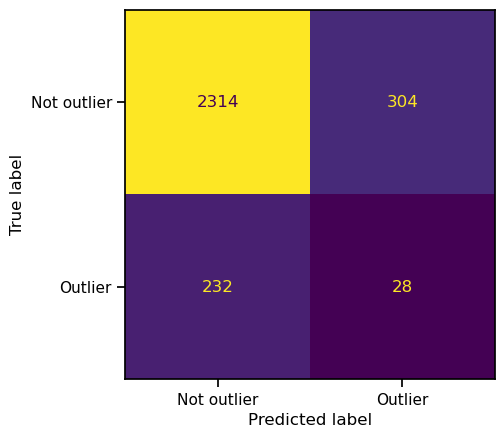

In [470]:
average_pred = safety_all[list(range(50))].max(axis=1)
cm = confusion_matrix(safety_all[target], average_pred.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not outlier', 'Outlier'])
disp.plot(colorbar=False)

## How many pulses are there?

In [1]:
data = load_data("../../data/data_for_ml.h5")

In [50]:
def print_num_pulses(cell_id):
    num_pulses = 0
    measurement_ids = set()
    for pulse in data:
        df = data[pulse]
        df = df[df['cell_id'].str.startswith(cell_id)]
        num_pulses += df.shape[0]
        measurement_ids.update(df['measurement_id'].to_list())
    print(cell_id)
    print('\tNum pulses: ', num_pulses)
    print('\tNum tests: ', len(measurement_ids))

In [51]:
print_num_pulses('A')
print_num_pulses('B')
print_num_pulses('C')
print_num_pulses('D')

A
	Num pulses:  10163
	Num tests:  49
B
	Num pulses:  4074
	Num tests:  28
C
	Num pulses:  19186
	Num tests:  94
D
	Num pulses:  14483
	Num tests:  84


## 3.3 Rationalizing why state-of-charge and available discharge capacity are easier to predict than total discharge capacity

In [5]:
def generate_soh_estimate_errors(delta_soc, soc_estimation_std_err, num_samples):
    rng = np.random.default_rng()
    soc_sample_errors = rng.normal(loc=0., scale=soc_estimation_std_err, size=(num_samples, 2))
    # SOH estimation is the estimated delta_soc (actual delta_soc plus the two errors), divided by the actual delta_soc, minus 1.
    return ((delta_soc + np.sum(soc_sample_errors, axis=1)) / delta_soc) - 1

C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_old

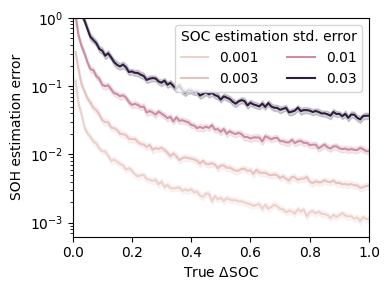

In [10]:
delta_soc = np.linspace(0.01, 1., 100)
soc_estimation_std_err = [0.001, 0.003, 0.01, 0.03]
num_samples = 200

is_1st = True
for d_soc in delta_soc:
    for soc_err in soc_estimation_std_err:
        errors = np.abs(generate_soh_estimate_errors(d_soc, soc_err, num_samples))
        if is_1st:
            calcs = {
                'delta_soc': np.full_like(errors, d_soc),
                'soc_estimation_std_error': np.full_like(errors, soc_err),
                'soh_error': errors,
            }
            is_1st = False
        else:
            calcs['delta_soc'] = np.concatenate((calcs['delta_soc'], np.full_like(errors, d_soc)))
            calcs['soc_estimation_std_error'] = np.concatenate((calcs['soc_estimation_std_error'], np.full_like(errors, soc_err)))
            calcs['soh_error'] = np.concatenate((calcs['soh_error'], errors))
calcs = pd.DataFrame.from_dict(calcs)

fig, ax = plt.subplots(figsize=(4,3))
go = sns.lineplot(
    data=calcs, x='delta_soc', y='soh_error', hue='soc_estimation_std_error',
    
)
go.set_xlabel(r"True $\Delta$SOC")
go.set_ylabel("SOH estimation error")
go.set(xticks=[0., 0.2, 0.4, 0.6, 0.8, 1.])
go.set(yscale='log')
go.set(ylim=(0,1), xlim=(0,1))

go.legend(loc='upper right', ncols=2, title="SOC estimation std. error")
plt.tight_layout()
plt.savefig('soh_from_soc.png')